In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import copy

[-14.62565536 -12.07002706 -10.82872247 -10.62823522  -9.71872557
  -9.71767476  -9.30175684  -8.18891438  -8.49830536]
[-14.54206196 -12.99145436 -10.65500713  -8.71359435  -8.20432055
  -8.58906014  -8.24758553  -6.46123117  -7.91876059  -7.1488575 ]
[-15.07940467 -15.16480417 -11.55624663  -9.33544578  -9.19600065
  -9.11462803  -9.46524965  -9.17540893  -8.41695066  -8.76660472]


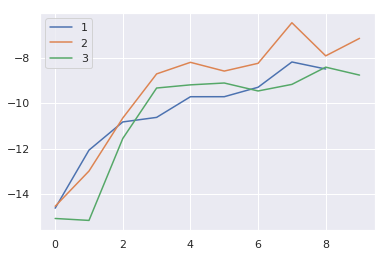

In [134]:
import seaborn as sns

#exp = 'debug-on-policy-no-prior-aligned-online-rb-rb-only-all'
#exp = 'sparse-batch1024-more-data-more-prior-fixed-reward-scale'
#exp_base = 'sparse-batch1024-5prior-radius2-seed{}'
#exps = [exp_base.format(x) for x in range(1, 3)]

# update z every traj (as in paper)
# update z every traj in training, every trans in eval
# update z every transition during train and eval
# update z every trans during train and eval, train with variable enc size (20-64)
exps = ['online-pearl-traj-initprior', 'pearl-online-accum-verify', 'pearl-online-verify']
epoch=9
#with open('./output/point-mass/{}/online-train-epoch{}.pkl'.format(exp, epoch), 'rb') as f:
    #data = pickle.load(f)
    #plt.figure()
    #plt.plot(data)

fig = plt.figure()
ax1 = fig.add_subplot(111)
data = []
for path in exps:
    with open('./output/point-mass-rnn/{}/online-test-epoch{}.pkl'.format(path, epoch), 'rb') as f:
        p = pickle.load(f)
        data.append(p)
        print(p)
for d in data:
    ax1.plot(d)
plt.legend(['1', '2', '3'])

In [2]:
# plot util
import os 
import csv 
import seaborn as sns
import matplotlib.patches as mpatches


def load_progress(progress_csv_path):
    #print("Reading %s" % progress_csv_path)
    entries = dict()
    with open(progress_csv_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            for k, v in row.items():
                if k not in entries:
                    entries[k] = []
                try:
                    entries[k].append(float(v))
                except:
                    entries[k].append(0.)
    entries = dict([(k, np.array(v)) for k, v in entries.items()])
    return entries

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]   

#colors = [(31, 119, 180), (255, 187, 120), (148, 103, 189), (152, 223, 138)]
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

#### Plot comparison with MAESN on sparse point mass navigation

/home/rakelly/miniconda3/envs/pearl/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/rakelly/miniconda3/envs/pearl/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


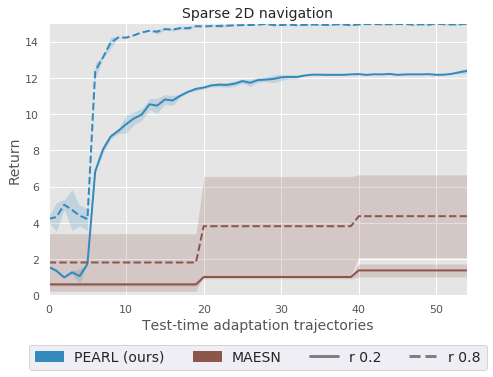

In [14]:
# plot MAESN data
plt.rcParams.update({'font.size': 28})
plt.style.use('ggplot')
matplotlib.use('TkAgg')
# do this to avoid Type 3 fonts, which ICML does not like
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

prop_cycle = plt.rcParams['axes.prop_cycle']
colors_cycle = prop_cycle.by_key()['color']
_ = colors_cycle.pop(0)
colors = [colors_cycle.pop(0)]
for _ in range(5):
    _ = colors_cycle.pop(0)
#colors.append(colors_cycle.pop(0))
colors.append((140 / 255., 86 / 255., 75 / 255.))

maesn_dir2 = '../maesn_suite/maesn/results/test/Maesn-PointEnv-radius2'
maesn_dir8 = '../maesn_suite/maesn/results/test/Maesn-PointEnv-radius8'
pearl_dir2 = 'sparse-batch1024-5prior-radius2-seed{}'
pearl_dir8 = 'sparse-batch1024-5prior-radius8-seed{}'

def prep_pearl_data(data_dir):
    exps = [data_dir.format(x) for x in range(1, 3)]
    epoch=199
    data = []
    for path in exps:
        with open('./output/point-mass/{}/online-test-epoch{}.pkl'.format(path, epoch), 'rb') as f:
            data.append(pickle.load(f))
    data = np.stack(data)
    return data

def prep_maesn_data(data_dir):
    all_data = []
    for seed in [0,1]:
        data = []
        for d in range(20):
            path = os.path.join(data_dir + '-seed{}'.format(str(seed)), str(d), 'progress.csv')
            task_data = load_progress(path)
            #print(len(task_data['AverageSparseReturn']))
            data.append(task_data['AverageSparseReturn'][:98])
        maesn_data = np.mean(np.stack(data), axis=0) # every 20 trajs
        maesn_data = np.concatenate([np.repeat(m, 20) for m in maesn_data]) # every traj
        maesn_data = maesn_data[:55]
        all_data.append(maesn_data)
    all_data = np.stack(all_data)
    return all_data

maesn2 = prep_maesn_data(maesn_dir2)
maesn8 = prep_maesn_data(maesn_dir8)
pearl2 = prep_pearl_data(pearl_dir2)
pearl8 = prep_pearl_data(pearl_dir8)


fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_subplot(111)
sns.set(style='darkgrid')
#plt.rcParams.update({'font.size': 28})
sns.tsplot(pearl2, color=colors[0], linewidth=2)
sns.tsplot(maesn2, ax=ax1, color=colors[1], linewidth=2)
sns.tsplot(pearl8, color=colors[0], linestyle='--', linewidth=2)
sns.tsplot(maesn8, ax=ax1, color=colors[1], linestyle='--', linewidth=2)
plt.xlabel('Test-time adaptation trajectories', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.ylim((0, 15))
plt.title('Sparse 2D navigation', fontsize=14)
pearlArtist = plt.Line2D((0, 1),(0,0), color=colors[0], linewidth=3)
pearlArtist = mpatches.Patch(color=colors[0])
maesnArtist = plt.Line2D((0,1),(0,0), color=colors[1], linewidth=3)
maesnArtist = mpatches.Patch(color=colors[1])
twoArtist = plt.Line2D((0,1),(0,0), color='grey', linewidth=3)
eightArtist = plt.Line2D((0,1),(0,0), color='grey', linewidth=3, linestyle='--')
plt.legend((pearlArtist, maesnArtist, twoArtist, eightArtist), ('PEARL (ours)', 'MAESN', 'r 0.2', 'r 0.8'), \
           loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.30), prop={'size':14})
#plt.legend((pearlArtist, maesnArtist), ('PEARL (ours)', 'MAESN'), \
           #loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.30), prop={'size':14})
plt.savefig('maesn_comparison.png', dpi=300, bbox_inches='tight')
#plt.savefig('maesn_comparison_radius02.png', dpi=300, bbox_inches='tight')

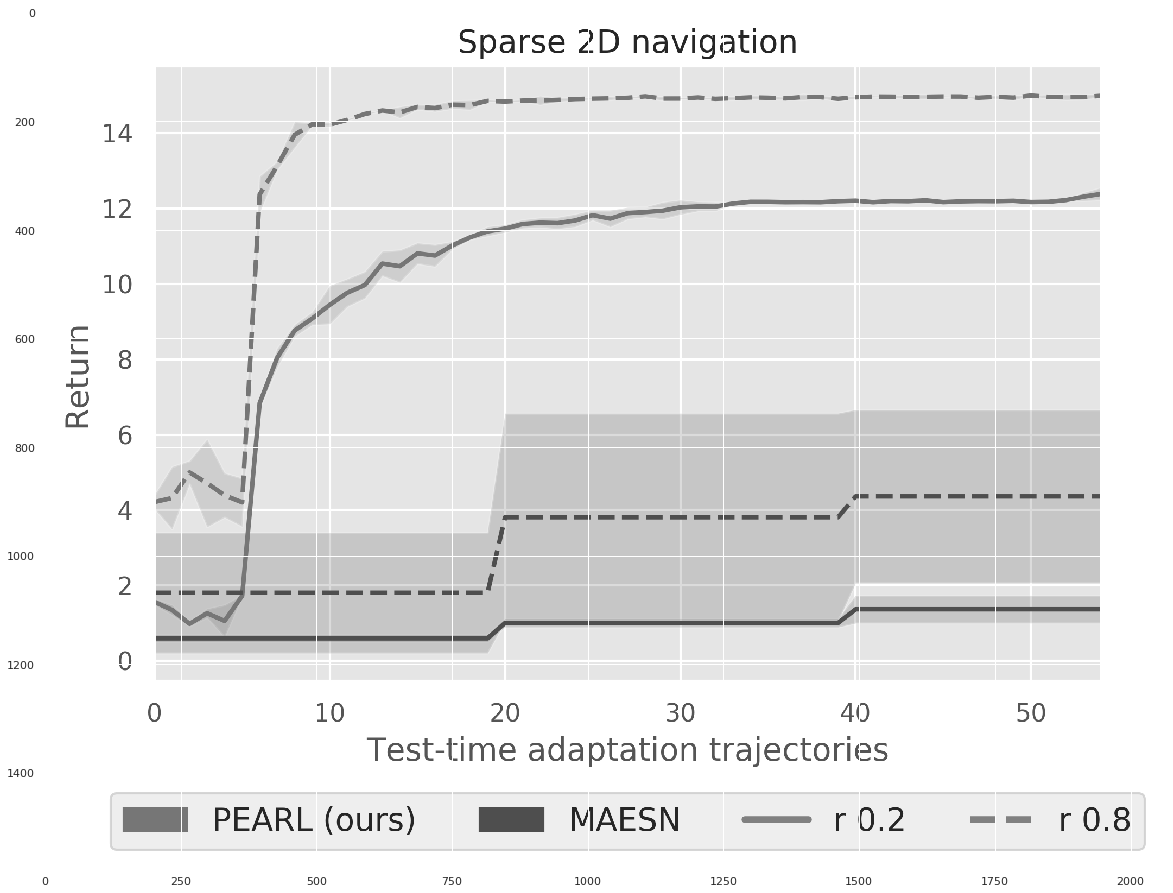

In [59]:
from PIL import Image
import PIL
img = Image.open('maesn_comparison.png').convert('LA')
plt.figure(figsize=(20,20))
plt.imshow(img)

#### Plot deterministic ablation

/home/rakelly/miniconda3/envs/pearl/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/rakelly/miniconda3/envs/pearl/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


[0, 200000, 400000, 600000, 800000, 1000000]


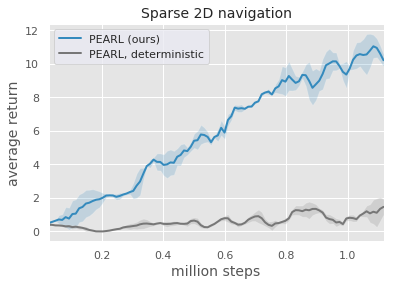

In [10]:
plt.rcParams.update({'font.size': 28})
plt.style.use('ggplot')
matplotlib.use('TkAgg')
# do this to avoid Type 3 fonts, which ICML does not like
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.ticker import ScalarFormatter


def prep_pearl_data(data_dir, seeds):
    exps = [data_dir.format(x) for x in seeds]
    paths = [os.path.join('./output/point-mass', e, 'progress.csv') for e in exps]
    xdata, ydata = [], []
    smoothing_window = 3
    for p in paths:
        xdata.append(load_progress(p)['Number of env steps total'][:100])
        y = load_progress(p)['AverageReturn_all_test_tasks'][:100]
        y = np.convolve(
            np.pad(y, int((smoothing_window - 1) / 2), 'edge'),
            np.ones((smoothing_window,)) / smoothing_window,
            mode='valid'
        )
        ydata.append(y)
    ydata = np.stack(ydata)
    xdata = xdata[0]
    return xdata, ydata

xdata, pearl = prep_pearl_data('sparse-batch1024-5prior-radius2-seed{}', [2,3])
_, pearl_det = prep_pearl_data('sparse-det-batch1024-5prior-radius2-seed{}', [1,2,3])


#print(xdata.shape, pearl.shape, pearl_det.shape)
                    
prop_cycle = plt.rcParams['axes.prop_cycle']
colors_cycle = prop_cycle.by_key()['color']
_ = colors_cycle.pop(0)
colors = [colors_cycle.pop(0)]
for _ in range(1):
    _ = colors_cycle.pop(0)
colors.append(colors_cycle.pop(0))

fig = plt.figure() #figsize=(6,5))
ax1 = fig.add_subplot(111)
sns.set(style='darkgrid')
#plt.rcParams.update({'font.size': 28})
sns.tsplot(pearl, time=xdata, color=colors[0], linewidth=2)
sns.tsplot(pearl_det, time=xdata, color=colors[1], linewidth=2)
plt.xlabel('million steps', fontsize=14)
plt.ylabel('average return', fontsize=14)
curr_x_ticks = [int(a) for a in ax1.get_xticks()[:-1]]
n = len(curr_x_ticks)
print(curr_x_ticks)
new_xtick_labels = [x / 1e6 for x in curr_x_ticks]
#new_x_ticks = [float(int(item)) / 10 for item in new_x_ticks]

#print(new_x_ticks)
#ax1.xaxis.set_major_formatter(ScalarFormatter())
#ax1.yaxis.set_major_formatter(ScalarFormatter())

#ax1.set_xticks(new_xtick)
ax1.set_xticklabels(new_xtick_labels)
#ax1.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

#plt.ylim((-3, 11))
plt.title('Sparse 2D navigation', fontsize=14)
pearlArtist = plt.Line2D((0, 1),(0,0), color=colors[0], linewidth=2)
pearldetArtist = plt.Line2D((0,1),(0,0), color=colors[1], linewidth=2)
plt.legend((pearlArtist, pearldetArtist), ('PEARL (ours)', 'PEARL, deterministic'))
plt.savefig('det-comparison-sparse.pdf', bbox_inches='tight')

/home/rakelly/miniconda3/envs/pearl/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


['#348ABD', (0.42745098039215684, 0.8, 0.8549019607843137), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)]


/home/rakelly/miniconda3/envs/pearl/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


[0, 200000, 400000, 600000, 800000, 1000000]


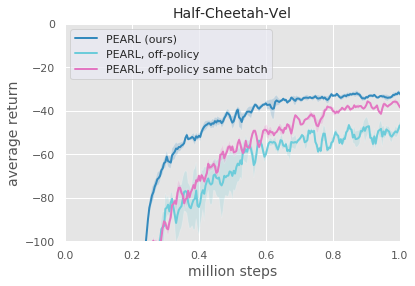

In [11]:
plt.rcParams.update({'font.size': 28})
plt.style.use('ggplot')
matplotlib.use('TkAgg')
# do this to avoid Type 3 fonts, which ICML does not like
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.ticker import ScalarFormatter


def prep_pearl_data(data_dir, seeds):
    exps = [data_dir.format(x) for x in seeds]
    paths = [os.path.join('../pearl-results', e, 'progress.csv') for e in exps]
    xdata, ydata = [], []
    smoothing_window = 3
    for p in paths:
        xdata.append(load_progress(p)['Number of env steps total'][:210])
        y = load_progress(p)['AverageReturn_all_test_tasks'][:210]
        y = np.convolve(
            np.pad(y, int((smoothing_window - 1) / 2), 'edge'),
            np.ones((smoothing_window,)) / smoothing_window,
            mode='valid'
        )
        ydata.append(y)
    ydata = np.stack(ydata)
    xdata = xdata[0]
    return xdata, ydata

xdata, pearl = prep_pearl_data('core-results/half-cheetah-vel/no-rf-final/cheetah-vel/{}/', [0, 1, 5, 6, 7])
_, pearl_off = prep_pearl_data('ablations/dont-clear-enc-buffer/half-cheetah-vel/dont-clear-enc-buffer/cheetah-vel/{}/', range(4))
_, pearl_off_same = prep_pearl_data('ablations/same-enc-rl-data/half-cheetah-vel/same-enc-rl-data/cheetah-vel/{}/', range(3))

colors = tableau20 
#colors = ['#4E79A7', '#F28E2C','#E15759', '#76B7B2', '#59A14F', '#EDC949', '#AF7AA1', '#FF9DA7', '#9C755F', '#BAB0AB']
tabcolors = [(109,204,218), (227, 119, 194)] #, 103.191.92, 237.151.202, 205.204.93, 168.120.110, 162.162.162, 109.204.218]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tabcolors)):    
    r, g, b = tabcolors[i]    
    tabcolors[i] = (r / 255., g / 255., b / 255.) 
    
prop_cycle = plt.rcParams['axes.prop_cycle']
colors_cycle = prop_cycle.by_key()['color']
_ = colors_cycle.pop(0)
colors = [colors_cycle.pop(0)]
colors += tabcolors

print(colors)



fig = plt.figure() #figsize=(6,5))
ax1 = fig.add_subplot(111)
sns.set(style='darkgrid')
#plt.rcParams.update({'font.size': 28})
sns.tsplot(pearl, time=xdata, color=colors[0], linewidth=2)
sns.tsplot(pearl_off, time=xdata, color=colors[1], linewidth=2)
sns.tsplot(pearl_off_same, time=xdata, color=colors[2], linewidth=2)
plt.xlabel('million steps', fontsize=14)
plt.ylabel('average return', fontsize=14)
plt.ylim((-100, 0))
plt.xlim((0, 1e6))
curr_x_ticks = [int(a) for a in ax1.get_xticks()]
n = len(curr_x_ticks)
print(curr_x_ticks)
new_xtick_labels = [x / 1e6 for x in curr_x_ticks]
ax1.set_xticklabels(new_xtick_labels)


plt.title('Half-Cheetah-Vel', fontsize=14)
pearlArtist = plt.Line2D((0, 1),(0,0), color=colors[0], linewidth=2)
pearloffArtist = plt.Line2D((0,1),(0,0), color=colors[1], linewidth=2)
pearloffsameArtist = plt.Line2D((0,1),(0,0), color=colors[2], linewidth=2)

plt.legend((pearlArtist, pearloffArtist, pearloffsameArtist), ('PEARL (ours)', 'PEARL, off-policy', 'PEARL, off-policy same batch'), loc='upper left')
plt.savefig('data-ablation-hc-vel.pdf', bbox_inches='tight')

/home/rakelly/miniconda3/envs/pearl/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


['#348ABD', (1.0, 0.596078431372549, 0.5882352941176471), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)]


/home/rakelly/miniconda3/envs/pearl/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


[0, 200000, 400000, 600000, 800000, 1000000]


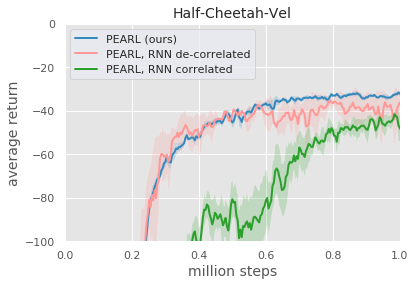

In [12]:
plt.rcParams.update({'font.size': 28})
plt.style.use('ggplot')
matplotlib.use('TkAgg')
# do this to avoid Type 3 fonts, which ICML does not like
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.ticker import ScalarFormatter


def prep_pearl_data(data_dir, seeds):
    exps = [data_dir.format(x) for x in seeds]
    paths = [os.path.join('../pearl-results', e, 'progress.csv') for e in exps]
    xdata, ydata = [], []
    smoothing_window = 3
    for p in paths:
        xdata.append(load_progress(p)['Number of env steps total'][:210])
        y = load_progress(p)['AverageReturn_all_test_tasks'][:210]
        y = np.convolve(
            np.pad(y, int((smoothing_window - 1) / 2), 'edge'),
            np.ones((smoothing_window,)) / smoothing_window,
            mode='valid'
        )
        ydata.append(y)
    ydata = np.stack(ydata)
    xdata = xdata[0]
    return xdata, ydata

xdata, pearl = prep_pearl_data('core-results/half-cheetah-vel/no-rf-final/cheetah-vel/{}/', [0, 1, 5, 6, 7])
_, pearl_off = prep_pearl_data('ablations/rnn-encoder/half-cheetah-vel/seed{}/', range(2))
_, pearl_off_same = prep_pearl_data('ablations/rnn-encoder-seq/half-cheetah-vel/seed{}/', range(3))

colors = tableau20 
#colors = ['#4E79A7', '#F28E2C','#E15759', '#76B7B2', '#59A14F', '#EDC949', '#AF7AA1', '#FF9DA7', '#9C755F', '#BAB0AB']
tabcolors = [(255, 152, 150), (44, 160, 44)] #, 103.191.92, 237.151.202, 205.204.93, 168.120.110, 162.162.162, 109.204.218]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tabcolors)):    
    r, g, b = tabcolors[i]    
    tabcolors[i] = (r / 255., g / 255., b / 255.) 
    
prop_cycle = plt.rcParams['axes.prop_cycle']
colors_cycle = prop_cycle.by_key()['color']
_ = colors_cycle.pop(0)
colors = [colors_cycle.pop(0)]
colors += tabcolors

print(colors)



fig = plt.figure() #figsize=(6,5))
ax1 = fig.add_subplot(111)
sns.set(style='darkgrid')
#plt.rcParams.update({'font.size': 28})
sns.tsplot(pearl, time=xdata, color=colors[0], linewidth=2)
sns.tsplot(pearl_off, time=xdata, color=colors[1], linewidth=2)
sns.tsplot(pearl_off_same, time=xdata, color=colors[2], linewidth=2)
plt.xlabel('million steps', fontsize=14)
plt.ylabel('average return', fontsize=14)
plt.ylim((-100, 0))
plt.xlim((0, 1e6))
curr_x_ticks = [int(a) for a in ax1.get_xticks()]
n = len(curr_x_ticks)
print(curr_x_ticks)
new_xtick_labels = [x / 1e6 for x in curr_x_ticks]
ax1.set_xticklabels(new_xtick_labels)


plt.title('Half-Cheetah-Vel', fontsize=14)
pearlArtist = plt.Line2D((0, 1),(0,0), color=colors[0], linewidth=2)
pearloffArtist = plt.Line2D((0,1),(0,0), color=colors[1], linewidth=2)
pearloffsameArtist = plt.Line2D((0,1),(0,0), color=colors[2], linewidth=2)

plt.legend((pearlArtist, pearloffArtist, pearloffsameArtist), ('PEARL (ours)', 'PEARL, RNN de-correlated', 'PEARL, RNN correlated'), loc='upper left')
plt.savefig('rnn-ablation-hc-vel.pdf', bbox_inches='tight')